In [1]:
!nvidia-smi

Tue Jul 28 16:14:21 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.51.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
#Sau khi mount với drive. Chuyển đến thư mục chứa file darknet.zip vừa tải lên
#Ví dụ tôi để ở thư mục gốc của Google Drive
cd drive/My\ Drive

/content/drive/My Drive


In [ ]:
#Giải nén file darknet.zip
!unzip darknet.zip

In [3]:
#Chuyển đến thư mục darknet
cd darknet

/content/drive/My Drive/darknet


In [ ]:
#Tạo thư mục backup để lưu lại weights khi huấn luyện
#Tên thư mục phải trùng với link folder backup trong file obj.data trên
!mkdir backup

In [ ]:
#Tạo file train.txt, valid.txt theo đoạn code
import os
import numpy as np
#"obj" là tên thư mục chứa cả ảnh và file annotation.
lst_files = os.listdir("data/obj/")
lst_images = []

for file in lst_files:
  if ".txt" not in file:
    lst_images.append(file)
    
#Tách 200 ảnh ra làm tập validation  
random_idx = np.random.randint(0, len(lst_images), 200)

#Tạo file train.txt được đặt trong thư mục darknet/data
with open("data/train.txt","w") as f:
  for idx in range(len(lst_images)):
    if idx not in random_idx:
      f.write("data/obj/"+lst_images[idx]+"\n")
      
#Tạo file valid.txt được đặt trong thư mục darknet/data
with open("data/valid.txt","w") as f:
    for idx in random_idx:
      f.write("data/obj/"+lst_images[idx]+"\n")

In [ ]:
#Biên dịch darknet (chỉ cần biên dịch một lần, lần sau dùng bỏ qua bước này)
!make

In [ ]:
#Phân quyền thực thi module darknet
!chmod +x ./darknet

In [ ]:
# Bắt đầu huấn luyện
!./darknet detector train data/obj.data yolo-tinyv4-obj.cfg yolov4-tiny.conv.29 -map -dont_show > yolotinv4_lisenceplate.log

Streaming output truncated to the last 5000 lines.
 total_bbox = 255764, rewritten_bbox = 0.000000 % 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 30 Avg (IOU: 0.830918, GIOU: 0.819705), Class: 0.999378, Obj: 0.977403, No Obj: 0.002380, .5R: 1.000000, .75R: 0.666667, count: 3, class_loss = 0.001108, iou_loss = 0.435894, total_loss = 0.437002 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 37 Avg (IOU: 0.879897, GIOU: 0.878465), Class: 0.996159, Obj: 0.988930, No Obj: 0.001153, .5R: 1.000000, .75R: 1.000000, count: 4, class_loss = 0.000311, iou_loss = 1.332404, total_loss = 1.332716 
 total_bbox = 255771, rewritten_bbox = 0.000000 % 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 30 Avg (IOU: 0.913373, GIOU: 0.912613), Class: 0.999580, Obj: 0.997808, No Obj: 0.001088, .5R: 1.000000, .75R: 1.000000, count: 2, class_loss = 0.000014, iou_loss = 0.485244, total_loss = 0.485258 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 37 Avg (IOU: 0.879830, GIOU: 

In [ ]:
# Danh sách các weights được lưu
!ls backup/

yolo-tinyv4-obj_1000.weights  yolo-tinyv4-obj_best.weights
yolo-tinyv4-obj_2000.weights  yolo-tinyv4-obj_last.weights


In [ ]:
# Dự đoán 
!./darknet detector test data/obj.data yolo-tinyv4-obj.cfg \
 backup/yolo-tinyv4-obj_best.weights test2.jpg

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	                           ->  104 x 104 x 128 
   9 max             

In [ ]:
# hàm để hiển thị kết quả dự đoán lên colab trực tiếp
def show(path):
  import cv2
  import matplotlib.pyplot as plt

  image = cv2.imread(path)
  original_width, original_height = image.shape[1], image.shape[0]
  resized_image = cv2.resize(image, (2*original_width, 2*original_height), interpolation = cv2.INTER_CUBIC)

  resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(20,10))
  plt.axis("off")
  plt.imshow(resized_image)
  plt.show()
  

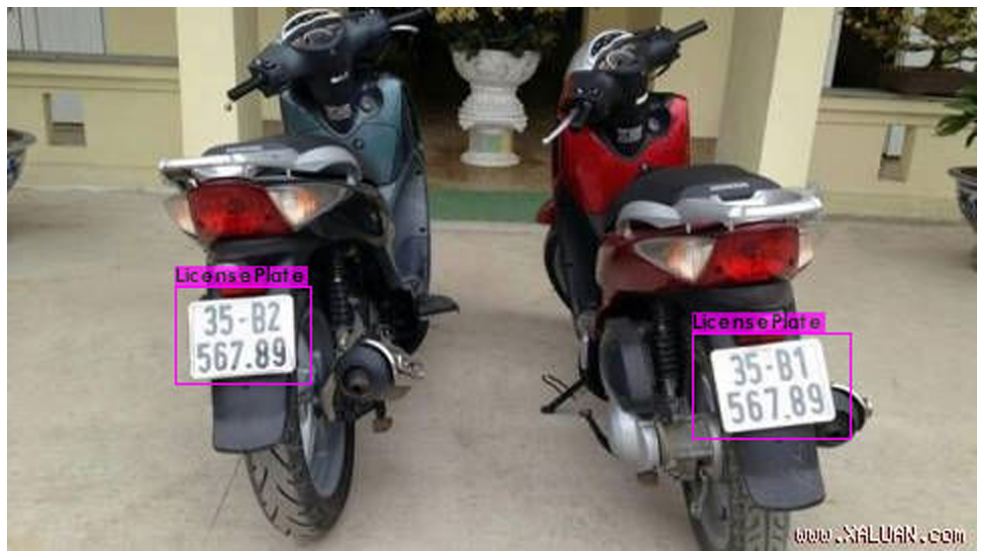

In [ ]:
show('predictions.jpg')